# Linear Regression

## Setup

In [16]:
# Loading Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from IPython.display import set_matplotlib_formats
sns.set()
set_matplotlib_formats('svg')

In [17]:
# Load Data
X = []
Y = []
for line in open('data_1d.csv'):
    x, y = line.split(',')
    X.append(float(x))
    Y.append(float(y))

X = np.array(X)
Y = np.array(Y)

In [18]:
# Preparing Data
inputs = X.copy()
inputs = inputs.reshape(len(inputs), 1)
inputs = np.insert(inputs, 0, 1, axis = 1)
targets = Y.copy()

### Visualizing Data

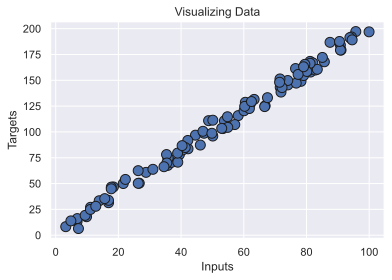

In [19]:
# Plot Data
plt.title('Visualizing Data')
plt.xlabel('Inputs')
plt.ylabel('Targets')
plt.plot(X, Y, 'bo', mec='k', ms=10)
plt.show()

## Main
<hr>

### Hypothesis Function
$$ 
h(x) = {\sum_{i=0}^{d}}{\theta_i}x_i = {\theta^T}x
$$
* $d$ is the total number of dimensions of input.
* ${\theta_i}$'s are the **parameters** (also called **weights**) parameterizing the space of linear functions mapping from $X$ to $Y$.

In [20]:
def ComputeHypothesis(x, theta):
    """
    Returns: The hypothesis computed using the passed inputs(x), and parameters(theta)
    """
    return x.dot(theta.T)

### Cost Function
$$
J({\theta}) = {\frac{1}{2}}{\sum_{i=1}^{n}}(h_{\theta}(x^{(i)}) - y^{(i)})^2
$$
This is the cost function (least squares cost) that gives rise to the **ordinary least squares** regression model.

In [21]:
def ComputeCost(x, y, theta):
    """
    Returns: The cost computed using the passed inputs(x), targets(y), and parameters(theta)
    """
    h = ComputeHypothesis(x, theta)
    return np.sum(np.square(h - y)) * 1/2

### LMS (Least Mean Squares) algorithm
$$
{\theta_j}:= {\theta_j}-{\alpha}{\frac{\partial}{\partial {\theta_j}}}J({\theta})
$$
This is the **gradient descent** algorithm, which starts with some initial ${\theta}$, and repeatedly performs the update.
* ${\alpha}$ is the **learning rate**.
* This is a very natural algorithm that repetedly takes step in the direction of steepest decrease of $J$.

Calculation: Only one training example $(x,y)$, neglect the sum in the definition of $J$:
$$
\begin{aligned}
{\frac{\partial}{\partial {\theta_j}}}J({\theta}) &= {\frac{\partial}{\partial {\theta_j}}} {\frac{1}{2}}{(h_{\theta}(x) - y)^2}
\\
&= 2.{\frac{1}{2}}(h_{\theta}(x) - y).{\frac{\partial}{\partial{\theta_j}}}(h_{\theta_j}(x) - y)
\\
&= (h_{\theta}(x) - y).{\frac{\partial}{\partial {\theta_j}}} \left({\sum^{d}_{i=0}}{\theta_i}x_i - y\right)
\\
&= (h_\theta - y)x_j
\end{aligned}
$$
For a single training example, this gives the update rule:
$$
\theta_j := \theta_j + \alpha \left(y^{(i)} - h_\theta (x^{(i)})\right)x_{j}^{(i)}
$$
This rule for updating the parameters is called the **LMS** update rule.
There are two ways to modify this method for a training set of more than one example.
The first is replace it with the following algorithm:<br><br>
Repeat until convergence {
$$
\theta := \theta + \alpha {\sum^{n}_{i=1}}\left(y^{(i)} - h_\theta (x^{(i)})\right)x^{(i)}
$$
}    
<br>
This is simple gradient descent on the origial cost function $J$.
* This method looks at every example in the entire training set on every step, and is called **batch gradient descent**


In [22]:
def gradient_descent(x, y, alpha, theta, epochs = 1500):
    """
    Returns two things:
    1. Optimized theta parameters as a numpy array
    2. The cost at every step as a numpy array
    """
    costs = []
    for i in range(epochs):
        h = ComputeHypothesis(x, theta)
        costs.append(ComputeCost(x, y, theta))
        theta += alpha * (y - h).dot(x)
    return theta, costs

In [23]:
# Performing gradient descent and calculating parameters
parameters = np.random.random(2)
parameters, cost = gradient_descent(inputs, targets, 1e-8, parameters)

### Visualizing how cost decreases over time

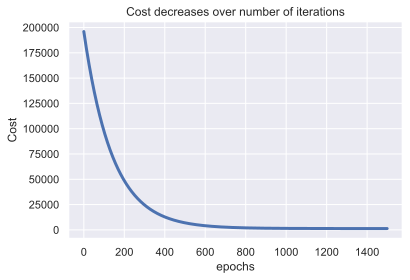

In [28]:
plt.plot(cost, linewidth=3)
plt.title('Cost decreases over number of iterations')
plt.xlabel('epochs')
plt.ylabel('Cost')
plt.show()

### Plotting the "best fit line" and data

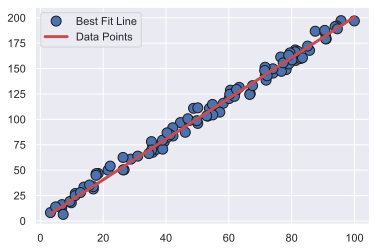

In [31]:
outputs = ComputeHypothesis(inputs, parameters)
plt.plot(X, Y, 'bo', mec='k', ms=10)
plt.plot(X, outputs, 'r-', linewidth=3)
plt.legend(['Best Fit Line', 'Data Points'])
plt.show()

In [29]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contour, showing minimum')
pass

NameError: name 'computeCost' is not defined